# Logistic Regression

### Predicting the status of a food desert based on distance from grocery store to bus stop, along with other demographic variables

#### Selected Variables:


LILATracts_halfAnd10: Flag for food desert when considering low accessibilty at 1/2 and 10 miles


distance: avg location from a SNAP store to a bus stop

POP2010: Population, tract total

OHU2010: Housing units, total

PovertyRate: Tract Poverty Rate

MedianFamilyIncome: Tract Median Family Income*

TractLOWI: Tract low-income population, number

TractKids: Tract children age 0-17, number

TractSeniors: Tract seniors age 65+, number

TractWhite: Tract White population, number

TractBlack: Track Black or African American population, number

TractAsian: Tract Asian population, number

TractNHOPI: Tract Native Hawaiian and Other Pacific Islander population, number

TractAIAN: Tract American Indian and Alaska Native population, number

TractOMultir: Tract Other/Multiple race population, number

TractHispanic: Tract Hispanic or Latino population, number

TractHUNV: Tract housing unites without a vehicle, number

TractSNAP: Tract housing units reveiving SNAP benefits, number







# Code

In [76]:
#dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [77]:
data = pd.read_excel(open('DataDownload2015.xlsx', 'rb'), sheet_name = 'Food Access Research Atlas', converters={'CensusTract':str})


In [78]:
data.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,01001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,01001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,01001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,01001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,01001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [79]:
filtered_data = data[data['County'] == 'Maricopa']

In [80]:
filtered_data.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
1459,04013010101,Arizona,Maricopa,0,5073,2246,0,0,0.000000,0,...,1645,4869,44,61,7,12,80,161,42,0
1460,04013010102,Arizona,Maricopa,1,4640,2041,0,0,0.000000,0,...,1240,4367,21,108,5,6,133,169,73,14
1461,04013030401,Arizona,Maricopa,1,4283,2008,0,47,0.010974,0,...,1431,4100,30,65,0,11,77,111,58,21
1462,04013030402,Arizona,Maricopa,1,3895,1706,0,0,0.000000,0,...,792,3627,27,27,3,18,193,320,0,19
1463,04013040502,Arizona,Maricopa,1,4861,2188,0,169,0.034766,1,...,1340,4343,12,24,1,85,396,759,195,258


In [81]:
for col in filtered_data.columns:
    print (col)

CensusTract
State
County
Urban
POP2010
OHU2010
GroupQuartersFlag
NUMGQTRS
PCTGQTRS
LILATracts_1And10
LILATracts_halfAnd10
LILATracts_1And20
LILATracts_Vehicle
HUNVFlag
LowIncomeTracts
PovertyRate
MedianFamilyIncome
LA1and10
LAhalfand10
LA1and20
LATracts_half
LATracts1
LATracts10
LATracts20
LATractsVehicle_20
LAPOP1_10
LAPOP05_10
LAPOP1_20
LALOWI1_10
LALOWI05_10
LALOWI1_20
lapophalf
lapophalfshare
lalowihalf
lalowihalfshare
lakidshalf
lakidshalfshare
laseniorshalf
laseniorshalfshare
lawhitehalf
lawhitehalfshare
lablackhalf
lablackhalfshare
laasianhalf
laasianhalfshare
lanhopihalf
lanhopihalfshare
laaianhalf
laaianhalfshare
laomultirhalf
laomultirhalfshare
lahisphalf
lahisphalfshare
lahunvhalf
lahunvhalfshare
lasnaphalf
lasnaphalfshare
lapop1
lapop1share
lalowi1
lalowi1share
lakids1
lakids1share
laseniors1
laseniors1share
lawhite1
lawhite1share
lablack1
lablack1share
laasian1
laasian1share
lanhopi1
lanhopi1share
laaian1
laaian1share
laomultir1
laomultir1share
lahisp1
lahisp1share
lahunv1

In [86]:
selected_columns = ['CensusTract', 'State', 'County', 'POP2010', 'OHU2010',
                   'NUMGQTRS', 'LILATracts_halfAnd10', 'PovertyRate', 
                   'MedianFamilyIncome', 'TractLOWI', 'TractKids',
                   'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
                   'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic',
                   'TractHUNV', 'TractSNAP']

In [87]:
filtered_data = filtered_data[selected_columns]

filtered_data.head()

,CensusTract,State,County,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
1459,04013010101,Arizona,Maricopa,5073,2246,0,0,4.5,116833,429,...,1645,4869,44,61,7,12,80,161,42,0
1460,04013010102,Arizona,Maricopa,4640,2041,0,0,7.9,143490,598,...,1240,4367,21,108,5,6,133,169,73,14
1461,04013030401,Arizona,Maricopa,4283,2008,47,0,6.2,107693,628,...,1431,4100,30,65,0,11,77,111,58,21
1462,04013030402,Arizona,Maricopa,3895,1706,0,0,7.6,108188,599,...,792,3627,27,27,3,18,193,320,0,19
1463,04013040502,Arizona,Maricopa,4861,2188,169,1,20.7,50377,2513,...,1340,4343,12,24,1,85,396,759,195,258


In [88]:
avg_distances = pd.read_csv('avg_distances.csv', dtype={'Census Tract':str})

In [101]:
avg_distances.head()

len(avg_distances)

916

In [100]:
len(avg_distances[(avg_distances['distance'] == 99) | (avg_distances['distance'] == 88)])

302

In [90]:
filtered_distances = avg_distances[(avg_distances['distance'] != 99) & (avg_distances['distance'] != 88)]

In [92]:
#combined_df = filtered_data.merge(filtered_distances, left_on='CensusTract', right_on='Census Tract')
combined_df = filtered_data.merge(avg_distances, left_on='CensusTract', right_on='Census Tract')

In [93]:
combined_df.head()

,CensusTract,State,County,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Census Tract,distance
0,04013010101,Arizona,Maricopa,5073,2246,0,0,4.5,116833,429,...,44,61,7,12,80,161,42,0,04013010101,99.0
1,04013010102,Arizona,Maricopa,4640,2041,0,0,7.9,143490,598,...,21,108,5,6,133,169,73,14,04013010102,99.0
2,04013030401,Arizona,Maricopa,4283,2008,47,0,6.2,107693,628,...,30,65,0,11,77,111,58,21,04013030401,88.0
3,04013030402,Arizona,Maricopa,3895,1706,0,0,7.6,108188,599,...,27,27,3,18,193,320,0,19,04013030402,88.0
4,04013040502,Arizona,Maricopa,4861,2188,169,1,20.7,50377,2513,...,12,24,1,85,396,759,195,258,04013040502,88.0


In [99]:
combined_df.to_csv('combined_data.csv')

## Model

In [94]:
predictors = ['POP2010', 'OHU2010','NUMGQTRS', 'PovertyRate',
              'MedianFamilyIncome', 'TractLOWI', 'TractKids',
              'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic',
              'TractHUNV', 'TractSNAP', 'distance']

X = combined_df[predictors]

y = combined_df['LILATracts_halfAnd10']

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [96]:
logistic_regression= LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

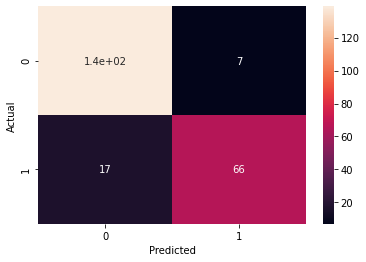

In [97]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [98]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8951965065502183
